In [1]:
!pip install tensorflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 48.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 41.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 23.0 MB/s eta 0:00:00 0:00:02
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

# Week 6 - Machine Learning Part 2: Unsupervised Learning and Neural Networks


# **Unsupervised Learning**
Unsupervised learning is a type of machine learning where algorithms infer patterns from a dataset without reference to known or labeled outcomes. Unlike supervised learning, unsupervised learning doesn’t aim to predict or classify data based on prior labels. Instead, it focuses on the underlying structure of the data, exploring data points' similarities, patterns, and differences. These patterns often reveal insights that are not immediately visible, making unsupervised learning valuable for exploratory data analysis and feature engineering.

## Key Techniques in Unsupervised Learning
1. **Clustering:** Groups similar data points together into clusters. Common algorithms include K-Means, Hierarchical Clustering, and DBSCAN.
2. **Dimensionality Reduction:** Reduces the number of variables under consideration, obtaining a set of principal variables. Techniques include Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE).
3. **Association:** Identifies rules that describe large portions of data, such as market basket analysis in retail.
4. **Anomaly Detection**: Identifying data points that deviate significantly from the rest of the data.
5. **Data Visualization**: Reducing data to two or three dimensions to visualize patterns.

# **Clustering**
**Clustering** is one of the most common applications of unsupervised learning. It involves dividing data points into groups where those in the same group are more similar to each other than to points in other groups. One of the most widely used clustering methods is **K-Means**.

## K-Means Clustering

K-Means is a clustering algorithm that groups data points into **k** clusters based on their similarity. It iteratively refines the cluster assignments to minimize the variance within each cluster and maximize the distinction between clusters. Below is an expanded explanation of how K-Means operates.

<p align="center">
<img src="https://media.datacamp.com/legacy/image/upload/v1678462092/image7_a1777d39aa.png" width=800>
</p>

#### **Key Concepts**
1. **Centroids:** A centroid represents the center of a cluster and is calculated as the mean of all data points assigned to that cluster. Centroids are recalculated during each iteration to ensure they remain representative of their assigned cluster. While centroids are typically computed in Euclidean space, other distance metrics (e.g., Manhattan or cosine distance) can also be used for specific applications.

2. **Distance Metric:**
The distance metric determines how the similarity between data points and centroids is measured. The Euclidean distance is the default and most commonly used metric. It measures the straight-line distance in multidimensional space. For non-Euclidean data or when clusters are not spherical, alternative distance metrics such as Manhattan or cosine distance may perform better. The equation for Euclidean distance is:
$$
d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

Where:
- p and q are two data points
- n is the number of dimensions

3. **Inertia:**
Inertia is the sum of squared distances between data points and their cluster centroids. It quantifies how tightly the data points are grouped around their respective centroids. Lower inertia values indicate better-defined clusters, but too low a value could signal overfitting, where clusters are too small to generalize well.

#### **The K-Means Algorithm**
The K-means Algorithgm follows the following process.

1. **Initialize Centroids:** k initial centroids are chosen, often at random, from the data points. Random initialization can sometimes lead to poor clustering results, which is why **K-Means++** is commonly used. K-Means++ ensures that initial centroids are spaced out, improving convergence speed and clustering quality.

2. **Assign Data Points to Clusters:** Each data point is assigned to the cluster whose centroid is closest, as measured by the distance metric. This step partitions the data space into **k**  regions, forming a Voronoi diagram.

3. **Update Centroids:** The centroid of each cluster is recalculated as the mean of all data points currently assigned to it. This step ensures that the centroid represents the center of gravity for the cluster.

4. **Repeat:** Steps 2 and 3 are repeated until the **Stopping Criteria** is met. The possible criteria are:
- **Centroid Convergence**: The algorithm stops when the centroids stabilize, meaning their positions do not change significantly between iterations. This indicates that the clusters have reached their optimal positions.
- **Maximum Iterations**: If convergence is slow, the algorithm stops after a predefined number of iterations, preventing excessive computation.
- **Tolerance Threshold**: A small tolerance value can be set, where changes in centroid positions smaller than this threshold are ignored.




#### **K-Means Clustering Example - Customer Segmentation Based on Energy Usage Patterns**
Electric utility companies can use clustering to segment their customers based on energy usage patterns. This segmentation can help in targeted marketing, tailored service offerings, and designing energy efficiency programs. Let’s consider a simple example using the K-Means clustering algorithm to segment customers based on hypothetical daily energy consumption data.

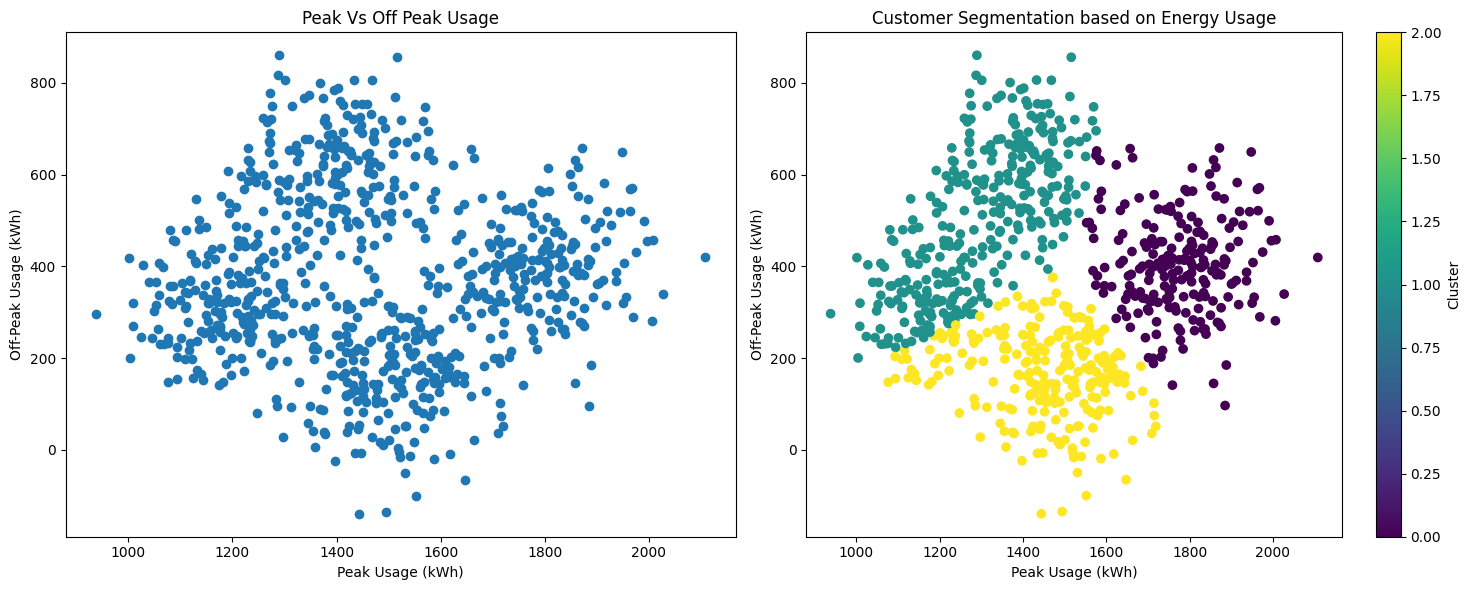

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some synthetic data for daily energy consumption (in kWh)
# For simplicity, we assume two main features: peak usage and off-peak usage
np.random.seed(42)

SAMPLE_SIZE = 200
# Peak usage in kWh
peak_usage_1 = np.random.normal(loc=1200, scale=100, size=SAMPLE_SIZE)  
peak_usage_2 = np.random.normal(loc=1500, scale=100, size=SAMPLE_SIZE)
peak_usage_3 = np.random.normal(loc=1800, scale=100, size=SAMPLE_SIZE)
peak_usage_4 = np.random.normal(loc=1400, scale=100, size=SAMPLE_SIZE)
peak_usage = np.concatenate((peak_usage_1,peak_usage_2,peak_usage_3,peak_usage_4))

# Off-peak usage in kWh
off_peak_usage_1 = np.random.normal(loc=300, scale=100, size=SAMPLE_SIZE)
off_peak_usage_2 = np.random.normal(loc=150, scale=100, size=SAMPLE_SIZE)  
off_peak_usage_3 = np.random.normal(loc=400, scale=100, size=SAMPLE_SIZE)  
off_peak_usage_4 = np.random.normal(loc=600, scale=100, size=SAMPLE_SIZE) 
off_peak_usage = np.concatenate((off_peak_usage_1,off_peak_usage_2,off_peak_usage_3,off_peak_usage_4))

# Create a DataFrame
data = pd.DataFrame({'Peak_Usage': peak_usage, 'Off_Peak_Usage': off_peak_usage})

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)

data['Cluster'] = kmeans.fit_predict(data[['Peak_Usage', 'Off_Peak_Usage']])

# Plot the clusters
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(data['Peak_Usage'], data['Off_Peak_Usage'])
plt.title('Peak Vs Off Peak Usage')
plt.xlabel('Peak Usage (kWh)')
plt.ylabel('Off-Peak Usage (kWh)')

plt.subplot(1,2,2)
plt.scatter(data['Peak_Usage'], data['Off_Peak_Usage'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation based on Energy Usage')
plt.xlabel('Peak Usage (kWh)')
plt.ylabel('Off-Peak Usage (kWh)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


The customer segmentation example based on energy usage patterns is an illustration of unsupervised learning primarily because it operates without the use of labeled data, which is the defining characteristic of unsupervised methods. In this scenario, the algorithm's objective was not to predict a predefined outcome but to explore the dataset and uncover intrinsic groupings or clusters among the customers based on their energy consumption habits. This exploration was facilitated by the K-Means clustering algorithm, a staple in unsupervised learning, which partitions the data into clusters by identifying patterns and similarities among the data points without any prior knowledge of what these patterns should be. The process was exploratory, aimed at understanding the data's structure to derive meaningful insights, such as distinct segments of customers with similar usage profiles. Unlike supervised learning, where model performance can be directly evaluated against known outcomes, the success of this unsupervised approach is gauged by the interpretability and practical relevance of the discovered clusters, demonstrating the essence of unsupervised learning in discovering hidden structures within unlabeled datasets.

#### **Choosing the Optimal k: The Elbow Method**
The Elbow Method is a graphical technique used to determine the ideal number of clusters **k**. It involves plotting inertia (within-cluster sum of squares) for different **k** values and identifying the "elbow point," where the rate of decrease in inertia slows down significantly.

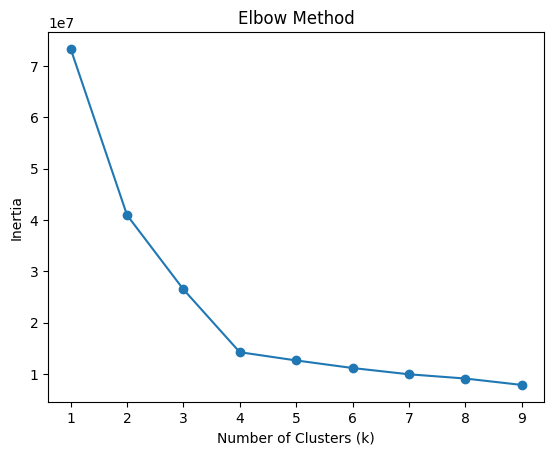

In [3]:
# Determine optimal k using the Elbow Method 
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Peak_Usage', 'Off_Peak_Usage']])
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

#### **Advantages of K-Means**
1. **Simplicity**: K-Means is easy to implement and understand, making it a popular choice for introductory clustering tasks. Its iterative approach and reliance on simple arithmetic operations make it accessible.
2. **Interpretability**: The results of K-Means are intuitive, as each data point is clearly assigned to a cluster, and the centroids can be visualized.

#### **Limitations of K-Means**
1. **Predefined k**: The user must specify **k** (the number of clusters) beforehand, which can be challenging without prior knowledge of the dataset. Tools like the **Elbow Method** or **Silhouette Score** can help determine the optimal **k**, but these require additional computation.
2. **Sensitivity to Initialization**: Poorly chosen initial centroids can lead to suboptimal clustering and slower convergence. The K-Means++ initialization mitigates this issue by choosing initial centroids that are well spaced out.
3. **Assumes Spherical Clusters**: K-Means assumes clusters are spherical and evenly distributed in the feature space, which may not hold true for all datasets. It struggles with clusters of varying densities, non-linear shapes, or overlapping boundaries.
4. **Outlier Sensitivity**: K-Means is sensitive to outliers, as they can significantly distort the position of centroids and cluster assignments. Preprocessing steps, such as outlier removal, can improve results.

#### **Improvements and Variants**
1. **K-Means++**: A variant of K-Means that selects initial centroids more intelligently by ensuring they are well spaced apart, improving both speed and accuracy.
2. **Mini-Batch K-Means**: Processes small, random subsets (batches) of data during each iteration, making it faster and more memory-efficient for large datasets.
3. **Soft K-Means**: Assigns probabilities to each data point for belonging to each cluster, rather than hard assignments. This is useful for datasets with ambiguous boundaries between clusters.
4. **Hierarchical K-Means**: Splits clustering into a hierarchy of sub-clusters, which can reveal finer structures in the data.

#### **Practical Use Cases of K-Means**
- **Customer Segmentation**: Groups customers based on purchasing behavior, preferences, or demographics to improve targeted marketing.
- **Image Compression**: Reduces image size by clustering similar pixel colors and replacing them with their centroid, effectively decreasing the number of unique colors.
- **Anomaly Detection**: Identifies unusual patterns in data by flagging points far from any centroid.
- **Document Clustering**: Groups similar documents or articles based on word embeddings or topic distributions.

# **Neural Networks (Deep Learning)**
Neural networks are a foundational element of deep learning, a subset of machine learning inspired by the structure and function of the human brain. These networks are composed of layers of interconnected nodes or "neurons," each capable of performing simple computations. When combined, these neurons can tackle complex problems, from image and speech recognition to natural language processing and beyond. This section of the lesson delves into the fundamentals of neural networks, their architecture, and their operational mechanisms.

<img src="img\AI_categories.png">

### The Basic Components

- **Neurons**: The basic computation units of a neural network, analogous to neurons in the biological brain. Each neuron receives input, processes it, and generates an output.
- **Weights**: Parameters that scale the input to a neuron. They are adjustable and are learned during the training process to minimize the error of the network's predictions.
- **Biases**: Additional parameters that allow the activation function to be shifted. They provide flexibility to the model, enabling it to better fit the data.
- **Activation Functions**: Non-linear functions applied to the weighted sum of inputs to a neuron. Common examples include ReLU (Rectified Linear Unit), Sigmoid, and Tanh. Activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*upfpVueoUuKPkyX3PR3KBg.png">

Then we can add more neurons:

<img src="https://www.researchgate.net/publication/335468765/figure/fig1/AS:11431281174318752@1689193246320/Our-neural-network-settings-weight-matrix-W-and-bias-b-are-recalibrated-in-the-learning.png">

### Neural Network Breakdown

Now that we know the basic components of a neural network we can look at the entire inner workings of a neural network from beginning to end.

#### **1. Input Layer**
The input layer is the entry point for the data into the neural network. Each neuron in the input layer corresponds to one feature in the dataset. For example:
- A dataset with 10 features will have an input layer with 10 neurons.
- Input data must be preprocessed (e.g., normalization or standardization) to ensure consistent scaling, which helps improve model performance.

**Key Considerations**:
- Input dimensions must match the number of features.
- Categorical data can cause issues within the context of a neural network. One solution is one-hot encoding the categorical data. Many other methods for handling categorical data are available at: [An Overview of Categorical Input Handling for Neural Networks](https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee)
- It is also important to ensure you address missing values or noisy data before feeding it into the network (as with any machine learning task).

---

#### **2. Hidden Layers**
Hidden layers are the intermediate layers between the input and output layers. They perform computations using **weights**, **biases**, and **activation functions** to transform the input into a form the output layer can use.

**Functions of Hidden Layers**:
- Extract and learn non-linear patterns in the data.
- Apply transformations to progressively abstract data.

**Design Choices**:
- Number of hidden layers: Shallow networks (1-2 layers) are sufficient for simpler tasks, while deep networks (3+ layers) are suited for complex data.
- Number of neurons: More neurons allow the network to capture finer details but risk overfitting.

---

#### **3. Weights and Biases**
- **Weights** represent the strength of connections between neurons. They are multiplied by the input values.
- **Biases** are added to the weighted sum to shift the activation function, allowing the network to model complex relationships.

**Mathematical Representation**:
For a neuron, the output $z$ is computed as:
$$ 
z = \sum (w_i \cdot x_i) + b 
$$
where $w_i$ are weights, $x_i$ are inputs, and $b$ is the bias.

---

#### **4. Activation Functions**
Activation functions introduce non-linearity into the network, enabling it to model complex relationships.

### Activation Functions
Activation functions play a crucial role in neural networks by introducing non-linear properties to the network, enabling it to learn complex data patterns and perform tasks beyond mere linear regression. Without activation functions, a neural network, regardless of how many layers it has, would behave just like a single-layer perceptron (linear classifier), limiting its ability to solve only linearly separable problems.

#### Common Activation Functions
- **Rectified Linear Unit (ReLU)**: Currently the most widely used activation function for hidden layers. It outputs the input directly if it's positive; otherwise, it outputs zero. ReLU helps with the vanishing gradient problem, enabling training of deeper networks, but it has to be used carefully due to the "dying ReLU" problem, where neurons can become inactive and stop contributing to the learning process.
- **Sigmoid**: Historically popular, it outputs values between 0 and 1. While it's useful for binary classification, it's less used in hidden layers of deep networks due to its vanishing gradient problem, where gradients become very small, impeding effective learning in deeper layers.
- **Hyperbolic Tangent (tanh)**: Similar to the sigmoid but outputs values between -1 and 1. It is zero-centered, making it a better choice in some cases, although it still suffers from the vanishing gradient problem.
- **Leaky ReLU and Parametric ReLU (PReLU)**: Variants of ReLU designed to address the dying ReLU problem by allowing a small, positive gradient when the unit is not active.
- **Softmax**: Often used in the output layer for multi-class classification problems. It converts logits (raw predictions) into probabilities by taking the exponential of each output and then normalizing these values by dividing by the sum of all the exponentials.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*ZafDv3VUm60Eh10OeJu1vw.png">

---

#### **5. Output Layer**
The output layer produces the final prediction. Its design depends on the type of problem:
- **Regression**: A single neuron with a linear activation function.
- **Binary Classification**: A single neuron with a sigmoid activation function.
- **Multi-Class Classification**: Multiple neurons (one per class) with a softmax activation function.

---

#### **6. Loss Function**
The loss function quantifies the difference between the predicted and actual outputs. The goal of training is to minimize this loss.

**Common Loss Functions**:
- **Regression**:
  - Mean Squared Error (MSE): $\text{MSE} = \frac{1}{n} \sum (y - \hat{y})^2$
  - Mean Absolute Error (MAE): $\text{MAE} = \frac{1}{n} \sum |y - \hat{y}|$
- **Classification**:
  - Binary Cross-Entropy: $-\frac{1}{n} \sum [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]$
  - Categorical Cross-Entropy for multi-class tasks.

---

#### **7. Optimizer**
Optimizers adjust weights and biases to minimize the loss function during training.
**Popular Optimizers**:
1. **Gradient Descent**: Updates weights in the direction of the negative gradient of the loss. Slow for large datasets.
2. **Stochastic Gradient Descent (SGD)**: Updates weights using a random subset (batch) of the data. Faster but noisier than full gradient descent.
3. **Adam (Adaptive Moment Estimation)**: Combines momentum and adaptive learning rates. Suitable for most tasks and widely used.

<img src="https://miro.medium.com/v2/resize:fit:1121/1*BSadUmTEasHvnby1U-leoQ.jpeg">


---

#### **8. Backpropagation**
Backpropagation is the algorithm used to train neural networks by minimizing the loss function. It involves:
1. Forward pass: Compute predictions using current weights.
2. Compute the loss.
3. Backward pass: Propagate the loss backward to calculate gradients for weights and biases.
4. Update weights using the optimizer.

---

A **GREAT** lecture introducing deep learning (70 mins): [Youtube - MIT Introduction to Deep Learning](https://www.youtube.com/watch?v=ErnWZxJovaM)


### Training a Neural Network
Training involves repeatedly passing a dataset through the network (forward propagation), calculating the loss, and then updating the weights and biases to minimize this loss (backpropagation and gradient descent). This process is performed over many iterations or epochs until the model's performance on a validation set no longer improves, indicating that the network has learned the underlying patterns in the data.

A REALLY good video that does an excellent job of explaining how a neural network works is available at [Neural Network In 5 Minutes](https://www.youtube.com/watch?v=bfmFfD2RIcg)

### Neural Network Architectures
There are various neural network architectures designed for specific tasks:

- **Fully Connected (Dense) Networks**: The simplest form of neural networks where each neuron in one layer is connected to every neuron in the next layer.
- **Convolutional Neural Networks (CNNs)**: Specialized for processing grid-like data such as images, using convolutional layers to capture spatial hierarchies.
- **Recurrent Neural Networks (RNNs)**: Designed for sequential data (e.g., time series or text), capable of maintaining information in 'memory' over time.
- **Autoencoders**: Used for unsupervised learning tasks like dimensionality reduction or feature learning, consisting of an encoder and a decoder network.
- **Generative Adversarial Networks (GANs)**: Comprise two networks, a generator and a discriminator, competing against each other to generate new data samples indistinguishable from real ones.

For more information on neural network architectures go to: [4 Types of Neural Network Architecture](https://www.coursera.org/articles/neural-network-architecture?msockid=3070ebf9122f66d32a3bf83613c267e7)

## Simple Classification Example

The Iris dataset is a classic dataset in machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. It consists of 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Each sample has four features: the length and the width of the sepals and petals, in centimeters.


In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for better readability
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows of the dataset
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a MLPClassifier model
# This example uses a neural network with one hidden layer of 100 neurons (default settings)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp.fit(X_train_scaled, y_train) # <- backwards propogation and stochastic gradient descent
y_pred = mlp.predict(X_test_scaled)

mlp_accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Feature scaling is a crucial preprocessing step in the context of neural networks and many other machine learning algorithms. It involves transforming the features in your dataset so they are on a similar scale. The most common methods of feature scaling include normalization (scaling the features to a range) and standardization (scaling the features to have a mean of 0 and a standard deviation of 1).

#### Comparison to Non-Neural Network

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf = RandomForestClassifier(random_state=42)

# Train models
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print accuracy
print(f"MLPClassifier Accuracy: {mlp_accuracy}")
print(f"RandomForestClassifier Accuracy: {rf_accuracy}")


MLPClassifier Accuracy: 1.0
RandomForestClassifier Accuracy: 1.0


## Simple Regression Example

This dataset contains information about various houses in Boston, including features like average number of rooms, property tax rate, crime rate, etc., and the target variable is the median value of owner-occupied homes in $1000s.

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a MLPRegressor model
# This example uses a neural network with two hidden layers, each with 50 neurons
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', random_state=42, max_iter=1000)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mlp_mse = mean_squared_error(y_test, y_pred)
mlp_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mlp_mse}")
print(f"R^2 Score: {mlp_r2}")


Mean Squared Error: 0.27730979205751277
R^2 Score: 0.7883792032394535


#### Linear Regression Comparison

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize model, train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluate models
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test,lr_pred)

# Print MSE
print(f"MLPRegressor Mean Squared Error: {mlp_mse}")
print(f"LinearRegression Mean Squared Error: {lr_mse}\n")

print(f"MLPRegressor R^2 Score: {mlp_r2}")
print(f"LinearRegression R^2 Score: {lr_r2}")


MLPRegressor Mean Squared Error: 0.27730979205751277
LinearRegression Mean Squared Error: 0.5558915986952422

MLPRegressor R^2 Score: 0.7883792032394535
LinearRegression R^2 Score: 0.5757877060324524


#### Multi-Layer Perceptron (MLP) Overview

- **Layers**: MLPs consist of an input layer, one or more hidden layers, and an output layer. Each layer, except for the input layer, is made up of neurons (or nodes).
- **Neurons**: Neurons in each layer are fully connected to the neurons in the subsequent layer, meaning every neuron in one layer connects to every neuron in the next layer.
- **Weights and Biases**: Each connection between neurons has an associated weight, and each neuron (except those in the input layer) has a bias. These weights and biases are the parameters that the network learns during the training process.
- **Activation Functions**: Neurons in hidden and output layers apply a non-linear activation function to their net input (the weighted sum of their inputs plus their bias). Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh. The choice of activation function affects the network's ability to learn complex patterns.

##### MLPClassifier

- **Purpose**: MLPClassifier is designed for classification tasks, where the goal is to assign input samples to one of several categories.
- **Output Layer**: In classification tasks, the output layer typically has one neuron per class and uses a softmax activation function for multi-class classification to produce probabilities of class membership.
- **Loss Function**: The cross-entropy loss function is commonly used, which measures the difference between the predicted probabilities and the actual class labels.

##### MLPRegressor

- **Purpose**: MLPRegressor is used for regression tasks, where the goal is to predict a continuous value based on input features.
- **Output Layer**: In regression tasks, the output layer usually has a single neuron for single-target regression (or one neuron per target variable for multi-target regression) and often uses linear or identity activation function, meaning the net input to the output neuron is directly outputted.
- **Loss Function**: Mean squared error (MSE) is a typical loss function for regression, measuring the average squared difference between predicted values and actual values.


# **Convolutional Neural Networks (CNN)** 

A CNN is a type of neural network based around the concept of **Convolution**. In a basic neural network a two or three-dimensional image is stretched into a 1 dimensional array. Each element of the array (being a pixel of our image) is connected to a neuron in the first layer of the neural network. Stretching an image in this way loses all form of spatial information that makes images so defining and explainable. This is what makes convolution so beneficial for image tasks, because the spacial information is kept.

Great introduction to Convolutional Neural Networks (55mins): [Youtube - MIT Convolutional Neural Networks](https://www.youtube.com/watch?v=NmLK_WQBxB4)

<img src="https://media.datacamp.com/legacy/image/upload/v1681492916/Architecture_of_the_CN_Ns_applied_to_digit_recognition_0d403dcf68.png">

## What is Convolution?
Convolution works by computing the following steps:
1. Applying element-wise multiplication between a patch of your image and a selected filter
2. Sum the result to produce a single numerical value. 
3. Slide the filter and repeat for next image patch. Each calculated numerical value in step 2 is passed to a neuron in the proceeding layer.

Convolution for a 3x3 filter:
$$
\sum_{i=1}^{3}\sum_{j=1}^{3}w_{ij}x_{i+p,j+q}
$$

![convolution_animation](img/convolution_animation.gif)

Explanation of convolution with moving graphics: [A Gentle Introduction To Convolutions](https://dev.to/marcomoscatelli/a-gentle-introduction-to-convolutions-visually-explained-4c8d#:~:text=Convolution%20is%20a%20simple%20mathematical%20operation%2C%20it%20involves,image%2C%20and%20repeating%20this%20process%20for%20all%20pixels.)


# Pooling
Pooling is another layer used in a CNN to reduce dimensionality (the size of the layer), whilst keeping only the most important information. As you do with convolution, pooling is completed by sliding a small window across the two-dimensional input and then returning a singular value from the window. The three main methods used are:
1. Max Pooling - Returnt the **largest** number within the sliding window
2. Min Pooling - Returnt the **smallest** number within the sliding window
3. Mean Pooling - Returnt the **mean** of the sliding window

The most common method is Max Pooling, because the largest number usually corresponds to the most important information. Pooling is usually completed following a convolution layer

![max_pooling_animation](img/max_pooling_animation.gif)

# Image Classification Example Using TensorFlow

In [9]:
import tensorflow
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

2025-01-20 04:39:26.776281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 04:39:27.097746: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 04:39:27.259643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737347967.507225    2363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737347967.572031    2363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 04:39:28.211709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [10]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [11]:
def show_images(train_images,
            	class_names,
            	train_labels,
            	nb_samples = 25, nb_row = 5):
    
	plt.figure(figsize=(12, 12))
	for i in range(nb_samples):
		plt.subplot(nb_row, nb_row, i + 1)
		plt.xticks([])
		plt.yticks([])
		plt.grid(False)
		plt.imshow(train_images[i], cmap=plt.cm.binary)
		plt.xlabel(class_names[train_labels[i][0]])
	plt.show()

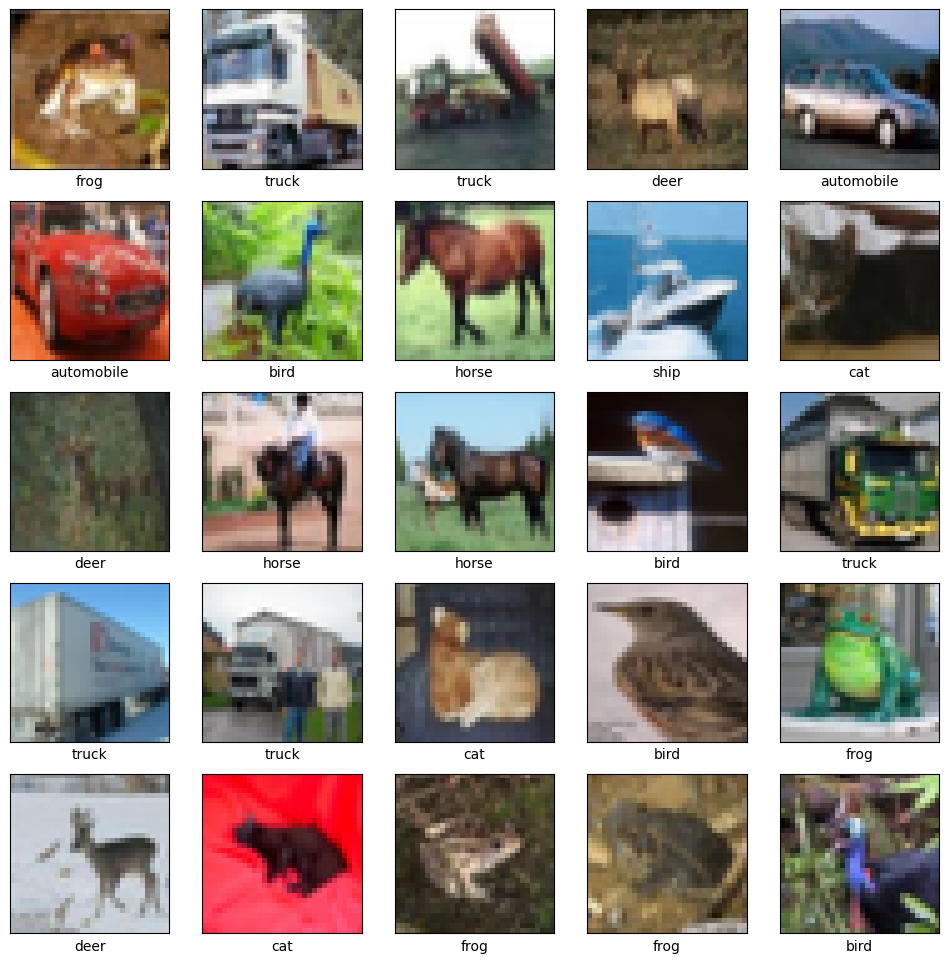

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

## Data Preprocessing
We need to normalise the pixel values to the same range (0 to 1) to remove scale invariance and increase convergence during training.

In [13]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

We need to convert our numerical categorical label into an array the size of our unique labels, with a value of 1 at the location in the array corresponding to the category. For example, for a classification problem with the class labels ['cat','dog','snake'], the class label for a 'cat' image would be [1, 0, 0]

In [14]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

## Model Architecture

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-20 04:39:55.886291: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [16]:
#Training
BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

2025-01-20 04:39:58.035668: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/30
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.1719 - loss: 2.3232 - precision: 0.0000e+00 - recall: 0.0000e+00  

2025-01-20 04:40:02.751429: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-01-20 04:40:02.755797: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-01-20 04:40:02.831474: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-01-20 04:40:02.836123: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.3975 - loss: 1.6620 - precision: 0.6359 - recall: 0.1577 - val_accuracy: 0.5949 - val_loss: 1.1651 - val_precision: 0.7566 - val_recall: 0.3877
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6144 - loss: 1.0982 - precision: 0.7564 - recall: 0.4601 - val_accuracy: 0.6441 - val_loss: 1.0276 - val_precision: 0.7886 - val_recall: 0.4801
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.6795 - loss: 0.9244 - precision: 0.7960 - recall: 0.5644 - val_accuracy: 0.6699 - val_loss: 0.9496 - val_precision: 0.7700 - val_recall: 0.5676
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.7203 - loss: 0.8127 - precision: 0.8181 - recall: 0.6204 - val_accuracy: 0.6858 - val_loss: 0.9227 - val_precision: 0.7722 - val_recall: 0.5960
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.7507 - loss: 0.7181 - precision: 0.8341 - recall: 0.6695 - val_accuracy: 0.6889 - val

# **Assessing Neural Network Performance**

---

#### 1. Evaluation Metrics
**Regression**:
- **Mean Absolute Error (MAE)**: Average of absolute differences between predicted and actual values.
- **Mean Squared Error (MSE)**: Emphasizes larger errors by squaring differences.
- **R-squared (R²)**: Proportion of variance in the dependent variable explained by the model.

**Classification**:
- **Accuracy**: Fraction of correct predictions.
- **Precision**: Ratio of true positives to predicted positives.
- **Recall**: Ratio of true positives to actual positives.
- **F1-Score**: Harmonic mean of precision and recall.
- **ROC-AUC**: Measures the trade-off between sensitivity and specificity.

---

#### 2. Learning Curves
Learning curves plot training and validation loss over epochs. They help diagnose issues such as:
- **Overfitting**: Training loss decreases, but validation loss increases.
- **Underfitting**: Both training and validation loss remain high.

---

#### 3. Overfitting Prevention
1. **Regularization**: L1 and L2 penalties add constraints to weights, reducing overfitting. Dropout randomly disables neurons during training.
2. **Early Stopping**: Stops training when validation loss stops improving.
3. **Data Augmentation**: Creates variations of input data to increase diversity.

Whether a model has overfit or underfit usually depends on model complexity. Two metrics used to represent overfit is bias and variance. Bias is the error between the actual and predicted values in the training data. Variance is how sensitive the model is to variation in the input features. This means that if our model has underfit, we will have high bias which means a high error in the training dataset. We will also have low variance because the model has generalised to the training data, and has not captured small changes. If the model has overfit, then it will follow very closely to the training dataset, creating a low bias (low error). However, now the model is very sensitive to changes in the training data, which means the model does not perform well when new data comes along. This is illustrated in the image below.

<img src="https://lilianweng.github.io/posts/2019-03-14-overfit/bias-variance-risk-curve.png">

---

#### 4. Visualizing Predictions
Visualization techniques help interpret how well the model performs:
- **Residual Plots**: Show the difference between actual and predicted values.
- **Scatter Plots**: Compare predicted vs. actual values.
- **Confusion Matrix**: Summarizes classification results for multi-class problems.
- **ROC and PR Curves**: Evaluate performance for imbalanced datasets.

---

## Example: Model Evaluation

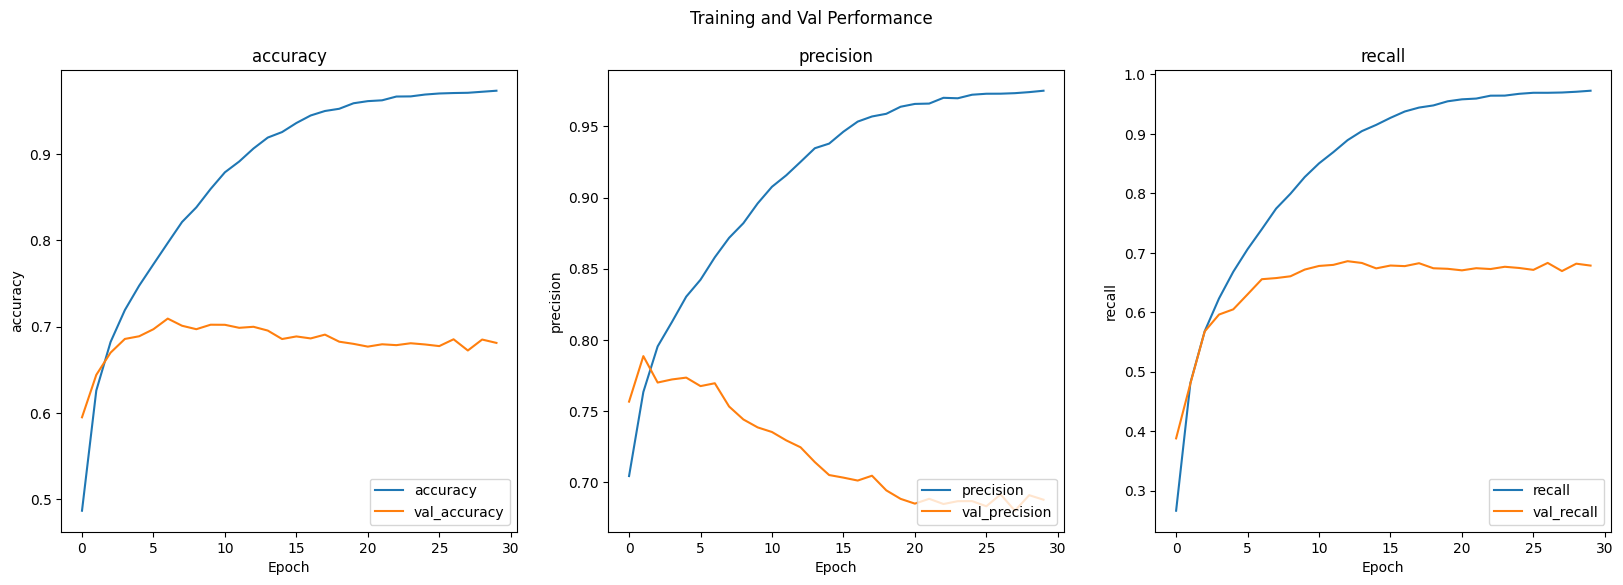

In [17]:

metric_list = ['accuracy','precision','recall']

plt.figure(figsize=(20,6))
for i, metric in enumerate(metric_list):

	train_perf = training_history.history[str(metric)]
	validation_perf = training_history.history['val_'+str(metric)]

	plt.subplot(1,3,i+1)
	plt.plot(train_perf, label=metric)
	plt.plot(validation_perf, label = 'val_'+str(metric))
    	 
	plt.xlabel('Epoch')
	plt.ylabel(metric)
	plt.title(metric)
	plt.legend(loc='lower right')

plt.suptitle("Training and Val Performance")
plt.show()


## Model Testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


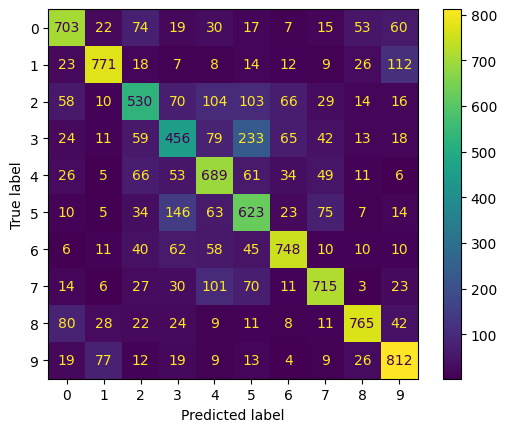

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

# **Types of Machine Learning**
### Supervised Learning:

#### Classification:
**Fault Detection:** Identifying and classifying types of faults in the power grid, such as short circuits or equipment failures.

**Intrusion Detection in Smart Grids:** Classifying network activities to detect malicious intrusions or cyber-attacks on the grid.
#### Regression:
**Load Forecasting (GRIDQUBE & Strategic Forecasting):** Predicting future electricity demand on different scales (e.g., household, regional, national) to optimise electricity generation and distribution.

**Renewable Energy Output Prediction:** Estimating the output of renewable energy sources like solar and wind power, which is crucial for integrating these sources into the grid.

### Unsupervised Learning:
#### Clustering:
**Customer Segmentation:** Grouping consumers based on consumption patterns to tailor services and pricing models.

**Anomaly Detection:** Identifying unusual patterns or outliers in electricity usage which could indicate technical problems or fraud.
#### Dimensionality Reduction:
**Feature Reduction in Power Quality Monitoring:** Reducing the number of variables monitored in power quality analysis to focus on the most relevant indicators.

### Reinforcement Learning:
**Grid Optimization:** Optimizing the operations of energy storage systems and power generation in response to changing supply and demand conditions.

**Demand Response Optimization:** Automatically adjusting electricity consumption in response to supply conditions, for example, by controlling heating, ventilation, and air conditioning (HVAC) systems in buildings.

### Semi-Supervised Learning:
**Power Grid Monitoring:** Enhancing the monitoring of grid conditions using a limited amount of labeled data combined with larger amounts of operational data to detect states like overloads or equipment degradation.

**Integration of Renewable Energy Sources:** Assisting in the integration of intermittent renewable sources into the grid by learning from both labeled and unlabeled data on energy patterns and grid stability.

### Deep Learning:

**Predictive Maintenance of Grid Infrastructure:** Using deep neural networks to analyze sensor data for early detection of equipment failures or maintenance needs.

**Energy Theft Detection:** Employing deep learning algorithms to analyze patterns in smart meter data to detect irregularities indicative of energy theft.

# Machine Learning Algorithm Selection

![ml-selection-cheatsheet](img/ml_algorithm_cheatsheet.PNG)
https://medium.com/dataflair/beat-the-heat-with-machine-learning-cheat-sheet-365c25bd1c3 

# **Challenge Task**
Create a CNN to classify images of numbers from the MNIST dataset. It is important that you complete the following:

1. Pre-process the data
2. Create CNN model and justify your decision on filter shape, number of filters, number of layers etc.
3. Train the model
4. Evaluate performance and determine ways to improve model

#### **Extra Challenge**: 
Create a Fully Connected Neural Network and compare its performance with your CNN.

In [19]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Complete your solution here

# **Optional Challenge Task 2**

Create a neural network of your choice to predict the California Housing Prices. Follow the process outlined in the challenge task above. We did use a MLPRegressor to complete this task in the notebook content above. Can you find a way to improve performance without using the MLPRegressor?

In [20]:
from tensorflow.keras.datasets import california_housing

(x_train, y_train), (x_test, y_test) = california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Extra Content**

# **Dimensionality Reduction**

Dimensionality reduction is a fundamental technique in data processing and machine learning that involves reducing the number of input variables or features in a dataset. The primary goals of dimensionality reduction are to simplify the dataset, speed up computation, and improve the performance of machine learning models. There are two main types of dimensionality reduction: feature selection and feature extraction.

### Feature Selection
Feature selection involves selecting a subset of the most important features from the original dataset. The key idea is to identify and retain only those features that contribute most significantly to the prediction variable or output in which you are interested. This approach can be done through various methods such as:

- **Filter methods**: These methods apply a statistical measure to assign a scoring to each feature; features are ranked by the score and either the top features are selected, or those below a certain threshold are removed.

- **Wrapper methods**: These methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated, and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

- **Embedded methods**: These methods perform feature selection as part of the model construction process. The most common methods are regularization methods like LASSO (Least Absolute Shrinkage and Selection Operator) that penalize the model for having too many variables.

### Feature Extraction

Feature extraction transforms the data in the high-dimensional space to a space of fewer dimensions. The data transformation may be linear, as in **Principal Component Analysis (PCA)**, or non-linear, as in **t-Distributed Stochastic Neighbor Embedding (t-SNE)**. The key idea is to preserve as much of the significant information as possible while reducing the dimensionality of the data. This is achieved through various techniques such as:

- **Principal Component Analysis (PCA):** PCA is a statistical procedure that uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The first principal component has the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components.
  
- **t-Distributed Stochastic Neighbor Embedding (t-SNE):** t-SNE is a non-linear technique particularly well suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback–Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
  
- **Autoencoders:** Autoencoders are a type of artificial neural network used to learn efficient codings of unlabeled data. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal "noise".


## Examples of High Dimensional Data
High-dimensional data refers to datasets with a large number of features (or dimensions) relative to the number of observations. Such data can be challenging to analyze and visualize due to the complexity and the "curse of dimensionality." Here are some examples of high-dimensional data:

1. **Genomic Data**: Genomic datasets often contain information on thousands to millions of genetic variants (like SNPs - Single Nucleotide Polymorphisms) across numerous individuals. Each genetic variant can be considered a dimension in the dataset.

2. **Image Data**: In image processing, each pixel can be considered a feature or dimension. For example, a 100x100 pixel grayscale image has 10,000 dimensions, and if the image is in color (RGB), the dimensionality triples to 30,000 because each pixel has three color channels.

3. **Text Data**: In natural language processing (NLP), text documents are often represented using models like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings, where each unique word or token in the corpus can be a dimension. Large text corpora can thus lead to very high-dimensional feature spaces.

4. **Financial Data**: Financial datasets can include a wide range of indicators, market indices, stock prices, trading volumes, and other economic factors for thousands of companies over multiple time points, leading to high-dimensional datasets.

5. **Sensor Data**: In fields like IoT (Internet of Things), sensor networks can generate data from numerous sensors (temperature, humidity, pressure, motion, etc.) collected over time, each sensor contributing to the dimensionality of the dataset.

6. **Social Network Data**: Data from social networks can be high-dimensional, considering the numerous features that can be extracted from user profiles, their connections, interactions, posts, likes, and comments.

7. **Medical Imaging Data**: Medical images, such as those from MRI, CT scans, or PET scans, contain information across three dimensions (and sometimes time, adding a fourth dimension), with each voxel (3D pixel) representing a feature.

8. **Consumer Behavior Data**: Datasets capturing consumer behavior, including purchase history, browsing patterns, product reviews, and demographic information, can become high-dimensional when analyzing a large number of products and consumer interactions.


## Introduction to Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that transforms a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the highest possible variance (it accounts for as much of the variability in the data as possible), and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components.

The main goals of PCA are to:
1. **Reduce Dimensionality**: By converting many possibly correlated variables into a smaller number of uncorrelated variables, PCA simplifies the complexity of high-dimensional data.
2. **Identify Hidden Patterns**: PCA helps to uncover hidden patterns in the data by highlighting the directions where the data varies the most.
3. **Visualize High-Dimensional Data**: By reducing the dimensionality, PCA allows for the visualization of high-dimensional data in a 2D or 3D space, making it easier to identify relationships and groupings within the data.

### How PCA Works
PCA involves the following steps:
- **Standardization**: The data is standardized to have a mean of 0 and a standard deviation of 1. This is important because PCA is sensitive to the variances of the initial variables.
- **Covariance Matrix Computation**: The covariance matrix expresses the relationships between the different variables in the dataset.
- **Eigenvalue and Eigenvector Calculation**: Eigenvalues and eigenvectors are computed from the covariance matrix to identify the principal components. Eigenvectors represent the directions of the axes where variance is maximized, and eigenvalues represent the magnitude of variance along those axes.
- **Component Selection**: Principal components are selected based on the magnitude of their eigenvalues. Components with higher eigenvalues carry more information.

PCA is widely used in exploratory data analysis and in making predictive models. It is commonly used as a tool to visualize genetic distance and relatedness between populations, in image compression, and in many areas of science and technology.


### Mathematical Formulation

#### Standardization
First, the data is standardized to have a mean of 0 and standard deviation of 1 for each feature:
$$ z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} $$
where $x_{ij}$ is the value of the $j$-th feature for the $i$-th observation, $\bar{x}_j$ is the mean of the $j$-th feature, and $s_j$ is the standard deviation of the $j$-th feature.

#### Covariance Matrix Computation
The covariance matrix $\Sigma$ is computed to understand how the variables of the input data vary together:
$$ \Sigma = \frac{1}{n-1} \mathbf{Z}^T\mathbf{Z} $$
where $\mathbf{Z}$ is the matrix of standardized data and $n$ is the number of observations.

#### Eigenvalue and Eigenvector Calculation
Eigenvalues and eigenvectors of the covariance matrix are computed. The eigenvector $\mathbf{v}$ and eigenvalue $\lambda$ must satisfy:
$$ \Sigma\mathbf{v} = \lambda\mathbf{v} $$
Eigenvectors represent the directions of maximum variance (principal components), and eigenvalues indicate the magnitude of variance in those directions.

#### Component Selection
Principal components are ranked by their corresponding eigenvalues in descending order. To reduce dimensionality, only the first $k$ principal components are selected, where $k$ is chosen based on the desired amount of total variance to retain:
$$ \text{Total Variance Retained} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{d} \lambda_i} $$
where $d$ is the total number of original features.

#### Projection onto New Feature Space
Finally, the original data is projected onto the new feature space spanned by the selected principal components to obtain the transformed data matrix $\mathbf{T}$:
$$ \mathbf{T} = \mathbf{Z}\mathbf{V}_{k} $$
where $\mathbf{V}_{k}$ is the matrix containing the first $k$ eigenvectors as columns.

PCA effectively reduces the dimensions of the dataset while preserving the most significant variance, making it easier to analyze, visualize, and use in subsequent machine learning models.


## PCA Examples: Eigenfaces Example with Olivetti Dataset

In this example, we use the Olivetti faces dataset from `sklearn.datasets` to demonstrate the concept of eigenfaces. The dataset consists of 400 images of faces, each with a resolution of 64x64 pixels. We'll apply PCA to extract the principal components, which we refer to as eigenfaces. These eigenfaces capture the most significant variations in the facial images and can be used to reconstruct the original faces.

### Steps:
1. **Load the Olivetti Faces Dataset**: We begin by loading the dataset and preparing the face images.
2. **Apply PCA**: We use PCA to reduce the dimensionality of the face images, preserving the features that account for the most variance.
3. **Visualize Eigenfaces**: The principal components obtained from PCA are the eigenfaces. We visualize the first few eigenfaces to understand the primary features captured by PCA.
4. **Face Reconstruction**: As an optional step, we can demonstrate how original faces can be approximated using a linear combination of the eigenfaces.

By analyzing eigenfaces, we can gain insights into the common features shared across different faces in the dataset, such as the general shape of the head, the eyes, and the mouth positioning.


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\gb191\scikit_learn_data


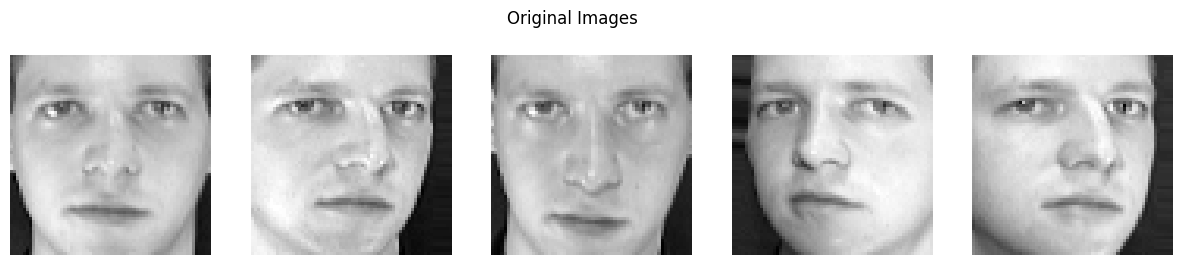

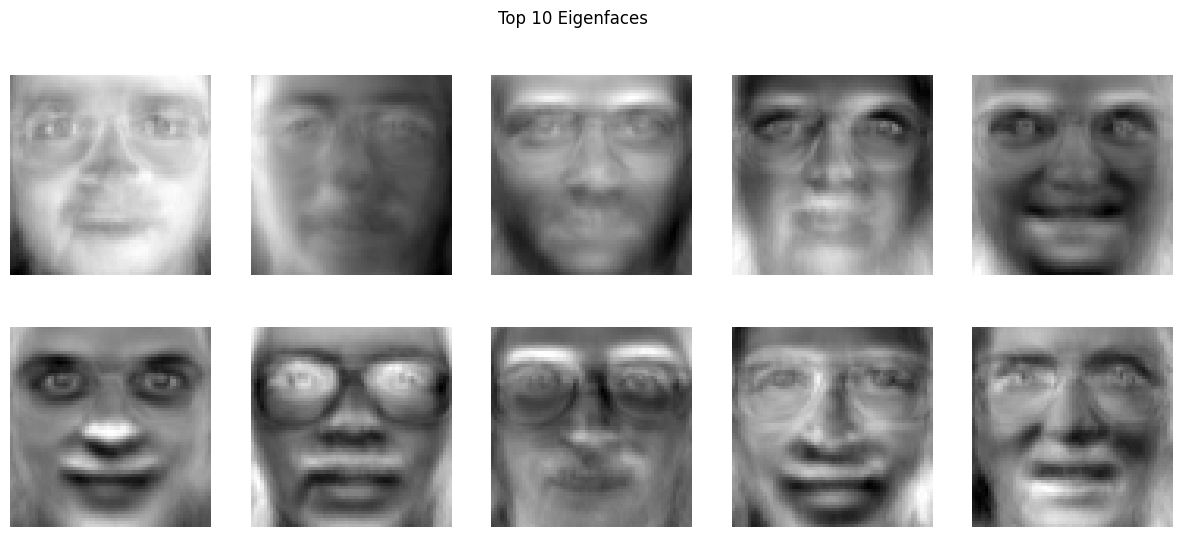

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# Load the Olivetti faces dataset
faces_data = fetch_olivetti_faces()
faces = faces_data.images

# Displaying the first 5 images in the dataset
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(faces[i], cmap='gray')
    ax[i].axis('off')
plt.suptitle('Original Images')
plt.show()

# Flatten the images for PCA
n_samples, height, width = faces.shape
X = faces.reshape(n_samples, height*width)

# Applying PCA to find eigenfaces
n_components = 50  # Number of eigenfaces
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Visualize the top 10 eigenfaces
eigenfaces = pca.components_.reshape((n_components, height, width))
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(eigenfaces[i], cmap='gray')
    ax[i // 5, i % 5].axis('off')
plt.suptitle('Top 10 Eigenfaces')
plt.show()


[[-6.255084   -1.8535084  -1.6507994  -0.38393673 -4.7419744  -0.21788718
  -3.1502678   3.0914893  -2.8167462  -0.11119897 -0.18615957 -1.8148639
   0.7165004   2.3895905   0.16119933  0.7086482   0.6414392  -1.9836562
   0.70893544  0.34262374 -1.5700618   0.58537173  1.0045447  -2.8410976
  -0.67222595 -1.3538145   1.3266715  -0.65883833  1.0105059  -0.36136296
  -0.13020901  0.45291373 -1.586362   -1.8247577  -1.4901705   0.03243744
   2.2708588  -1.9914925  -0.77008194 -1.2794852  -1.3282502  -0.71125567
   0.03977064  2.0834763   1.6828661  -1.0494981  -1.9175543  -2.2065697
  -0.36173692  1.8590572 ]]
Image shape: (64, 64)


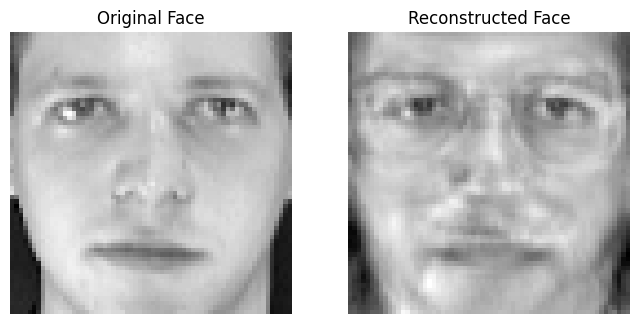

In [107]:
def get_face_vector(face_image, pca, mean_face):
    """
    Project a given face image onto the PCA (eigenface) space to get its vector representation.

    Parameters:
    - face_image: 2D array, the given face image to be transformed.
    - pca: trained PCA model.
    - mean_face: 1D array, the average face calculated from the training set.

    Returns:
    - face_vector: 1D array, the vector representation of the face in the PCA space.
    """

    # Flatten the given face image
    face_flat = face_image.reshape(1, -1)

    # Subtract the mean face
    face_normalized = face_flat - mean_face

    # Use PCA to transform the face into its vector representation
    face_vector = pca.transform(face_normalized)

    return face_vector

def reconstruct_face(face_vector, pca, mean_face, image_shape):
    """
    Reconstruct a face image from its PCA vector representation.

    Parameters:
    - face_vector: 1D array, the PCA vector representation of the face.
    - pca: trained PCA model.
    - mean_face: 1D array, the average face calculated from the training set.
    - image_shape: tuple, the shape (height, width) of the face images.

    Returns:
    - reconstructed_face: 2D array, the reconstructed face image.
    """

    # Inverse transform the PCA vector to get back to the original space
    face_flat_reconstructed = pca.inverse_transform(face_vector)

    # Add the mean face
    face_flat_reconstructed += mean_face

    # Reshape the flat array back to the original image shape
    reconstructed_face = face_flat_reconstructed.reshape(image_shape)

    return reconstructed_face


# Assuming 'pca' is your trained PCA model from the previous code
# and 'mean_face' is the average face of the training set
mean_face = X.mean(axis=0)

# Example: Transforming the first face in the dataset
given_face = faces[0]  # This should be replaced with the new face image you want to transform
given_face_vector = get_face_vector(given_face, pca, mean_face)

# given_face_vector now contains the PCA (eigenface) space representation of the given face
print(given_face_vector)

# Image shape (height and width of the images in the dataset)
image_shape = (height, width)

print("Image shape:", image_shape)

# Reconstructing the face from its PCA vector representation
reconstructed_face = reconstruct_face(given_face_vector, pca, mean_face, image_shape)

# Display the original and reconstructed face for comparison
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(given_face, cmap='gray')
ax[0].title.set_text('Original Face')
ax[0].axis('off')

ax[1].imshow(reconstructed_face, cmap='gray')
ax[1].title.set_text('Reconstructed Face')
ax[1].axis('off')

plt.show()

How could we use eigenfaces and PCA to construct a facial recognition system?